In [10]:
# Importing importand libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading dataset to notebook
data = pd.read_csv('2_data.csv')
data.shape

(379139, 21)

In [6]:
# Viewing first few rows and columns
data.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content ID,Ad Content Type,...,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,NaN,Text,...,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,NaN,Text,...,10,6,5,0,0,0,1,0,0,0


In [7]:
# Checking columns details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379139 entries, 0 to 379138
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                379139 non-null  object 
 1   Campaign ID         379139 non-null  int64  
 2   Campaign Goal Code  379139 non-null  object 
 3   Campaign Ad ID      379139 non-null  int64  
 4   Ad Digital Channel  379139 non-null  object 
 5   Ad channel partner  379139 non-null  object 
 6   Ad Device           121221 non-null  object 
 7   Ad Group            121221 non-null  float64
 8   Ad Content ID       235150 non-null  float64
 9   Ad Content Type     379042 non-null  object 
 10  Audience Type       379139 non-null  object 
 11  $ Spend             379139 non-null  int64  
 12  # Impressions       379139 non-null  int64  
 13  # Clicks            379139 non-null  int64  
 14  # Video Completes   379139 non-null  int64  
 15  # Social Likes      379139 non-nul

In [8]:
# Cheking percentage missing values in each colums
percentage_missing = data.isnull().sum()*100/len(data)
percentage_missing

Date                   0.000000
Campaign ID            0.000000
Campaign Goal Code     0.000000
Campaign Ad ID         0.000000
Ad Digital Channel     0.000000
Ad channel partner     0.000000
Ad Device             68.027293
Ad Group              68.027293
Ad Content ID         37.977892
Ad Content Type        0.025584
Audience Type          0.000000
$ Spend                0.000000
# Impressions          0.000000
# Clicks               0.000000
# Video Completes      0.000000
# Social Likes         0.000000
# Social Shares        0.000000
# Web Visit            0.000000
# Collateral View      0.000000
# Product View         0.000000
# Form Complete        0.000000
dtype: float64

In [9]:
# Replacing Ad Device column's missing values with other as we dont want to drop 37% cloumns.
data['Ad Device'].fillna('Other', inplace=True)

In [10]:
# Replacing Ad Group column's missing values with other as we dont want to drop 37% cloumns.
data['Ad Group']= data['Ad Group'].fillna('Unavailable')

In [11]:
data.shape

(379139, 21)

In [12]:
# Ad Content ID will be not very usefull for our analysis hence dropping it
data = data.drop(['Ad Content ID'], axis=1)

In [13]:
data.shape

(379139, 20)

In [14]:
# Dropping Ad Content Types missing records because missing rows are only 0.025%
data = data.dropna()

In [15]:
# Final data with no missing records
percentage_missing = data.isnull().sum()*100/len(data)
percentage_missing

Date                  0.0
Campaign ID           0.0
Campaign Goal Code    0.0
Campaign Ad ID        0.0
Ad Digital Channel    0.0
Ad channel partner    0.0
Ad Device             0.0
Ad Group              0.0
Ad Content Type       0.0
Audience Type         0.0
$ Spend               0.0
# Impressions         0.0
# Clicks              0.0
# Video Completes     0.0
# Social Likes        0.0
# Social Shares       0.0
# Web Visit           0.0
# Collateral View     0.0
# Product View        0.0
# Form Complete       0.0
dtype: float64

In [16]:
data.shape

(379042, 20)

In [17]:
data.head()

,Date,Campaign ID,Campaign Goal Code,Campaign Ad ID,Ad Digital Channel,Ad channel partner,Ad Device,Ad Group,Ad Content Type,Audience Type,$ Spend,# Impressions,# Clicks,# Video Completes,# Social Likes,# Social Shares,# Web Visit,# Collateral View,# Product View,# Form Complete
0,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Tablets,18.0,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
1,12/14/2022,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,Text,Audience Type 1,25,72,50,0,0,0,0,0,0,0
2,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,13.0,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
3,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,18.0,Text,Audience Type 1,0,0,0,0,0,0,0,0,0,0
4,1/11/2023,3,Intent to Buy,921,Search,Channel Partner 1,Computers,20.0,Text,Audience Type 1,10,6,5,0,0,0,1,0,0,0


In [18]:
# Importing clean data to csv file to do analysis in Tableau
#data.to_csv('hp_data.csv')

In [34]:
# spend_data = data[data['$ Spend'] != 0]
#spend_data.to_csv('spend_hp_data_2.csv')

In [31]:
data['$ Spend'].sum()

6699143

In [32]:
spend_data['$ Spend'].sum()

6699143

In [38]:
spend_data.shape

(266304, 20)

In [60]:
# calculate the correlation matrix
df = data.loc[:, ~data.columns.isin(['Campaign ID','Campaign Ad ID'])]

<AxesSubplot:>

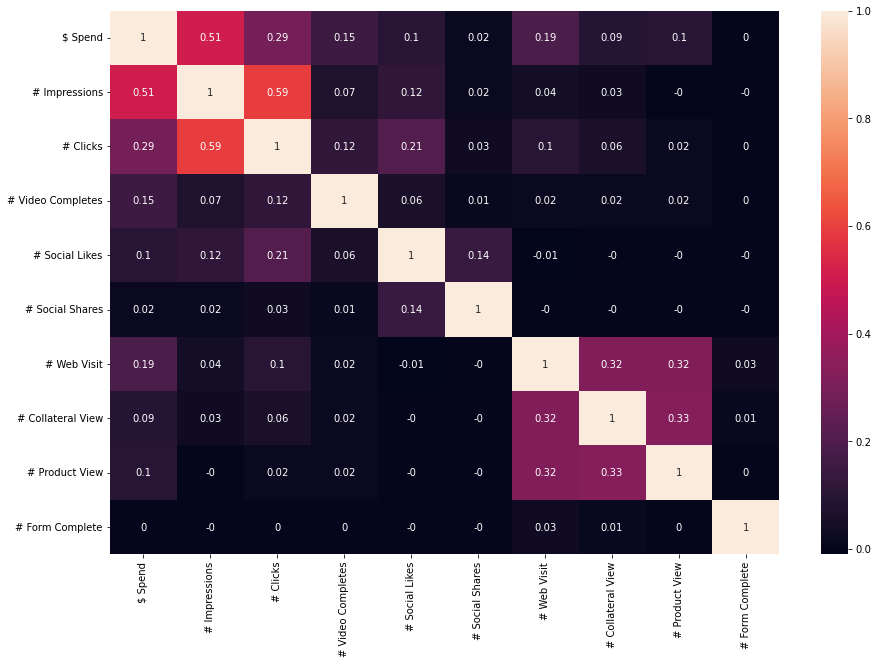

In [71]:

corr = df.corr().round(2)

# plot the heatmap
fig, ax = plt.subplots(figsize=(15,10))        # Sample figsize in inches
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax, annot = True)

In [15]:
data2 = pd.read_csv('spend_hp_data_2.csv')

In [16]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266304 entries, 0 to 266303
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         266304 non-null  int64  
 1   Date               266304 non-null  object 
 2   Campaign ID        266304 non-null  int64  
 3   CampaignGoalCode   266304 non-null  object 
 4   CampaignAdID       266304 non-null  int64  
 5   AdDigitalChannel   266304 non-null  object 
 6   Adchannelpartner   266304 non-null  object 
 7   AdDevice           266304 non-null  object 
 8   AdGroup            266304 non-null  object 
 9   AdContentType      266304 non-null  object 
 10  AudienceType       266304 non-null  object 
 11  $ Spend            266304 non-null  int64  
 12  # Impressions      266304 non-null  int64  
 13  # Clicks           266304 non-null  int64  
 14  # Video Completes  266304 non-null  int64  
 15  # Social Likes     266304 non-null  int64  
 16  # 

<AxesSubplot:xlabel='$ Spend', ylabel='# Impressions'>

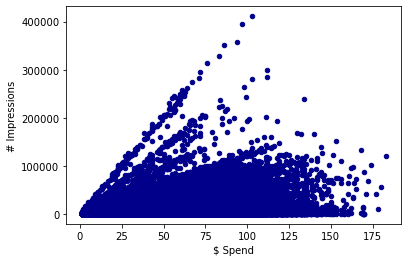

In [17]:
data2.plot.scatter(x='$ Spend', y='# Impressions', c='DarkBlue')

<AxesSubplot:xlabel='$ Spend', ylabel='# Clicks'>

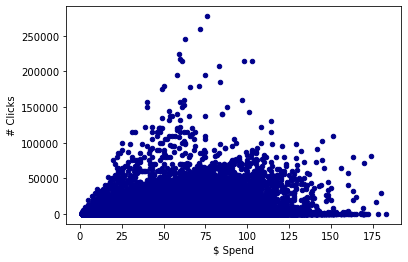

In [18]:
data2.plot.scatter(x='$ Spend', y='# Clicks', c='DarkBlue')

<AxesSubplot:xlabel='$ Spend', ylabel='# Video Completes'>

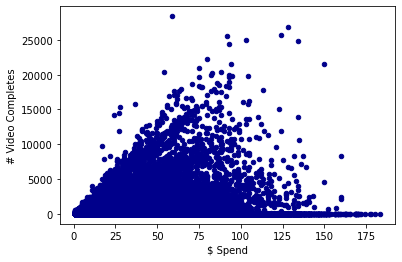

In [19]:
data2.plot.scatter(x='$ Spend', y='# Video Completes', c='DarkBlue')

<AxesSubplot:xlabel='$ Spend', ylabel='# Social Likes'>

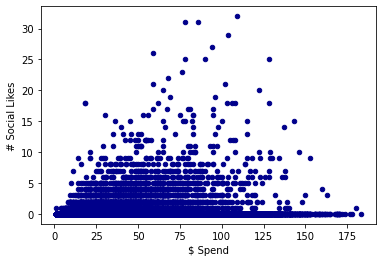

In [20]:
data2.plot.scatter(x='$ Spend', y='# Social Likes', c='DarkBlue')


<AxesSubplot:xlabel='$ Spend', ylabel='# Social Shares'>

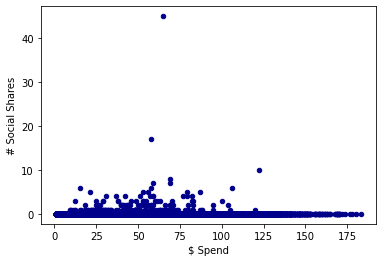

In [21]:
data2.plot.scatter(x='$ Spend', y='# Social Shares', c='DarkBlue')

<AxesSubplot:xlabel='$ Spend', ylabel='# Web Visit'>

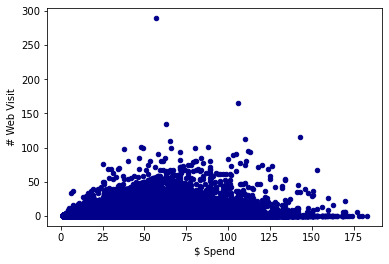

In [22]:
# Web Visit 
data2.plot.scatter(x='$ Spend', y='# Web Visit', c='DarkBlue')

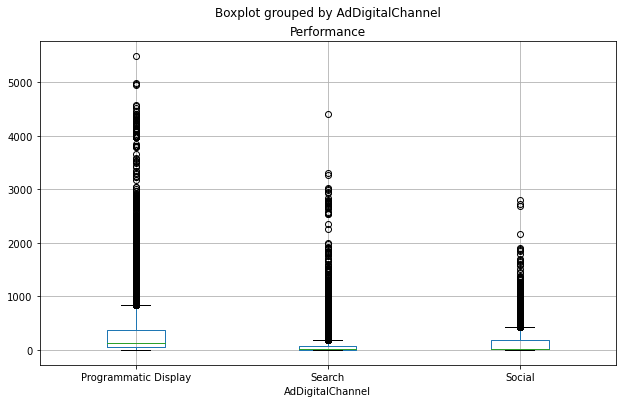

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

data2.boxplot(column='Performance', by='AdDigitalChannel', figsize=(10, 6))
plt.show()

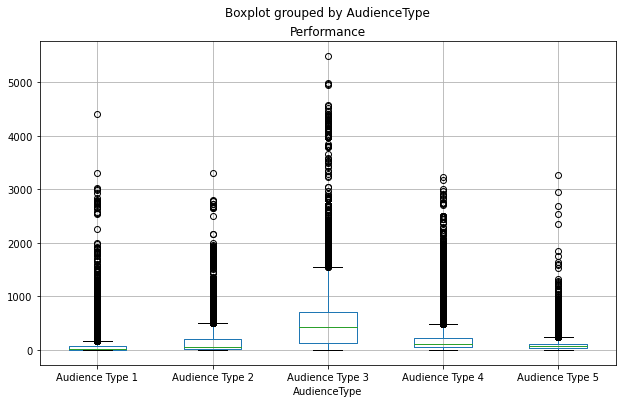

In [166]:
import pandas as pd
import matplotlib.pyplot as plt

data2.boxplot(column='Performance', by='AudienceType', figsize=(10, 6))
plt.show()

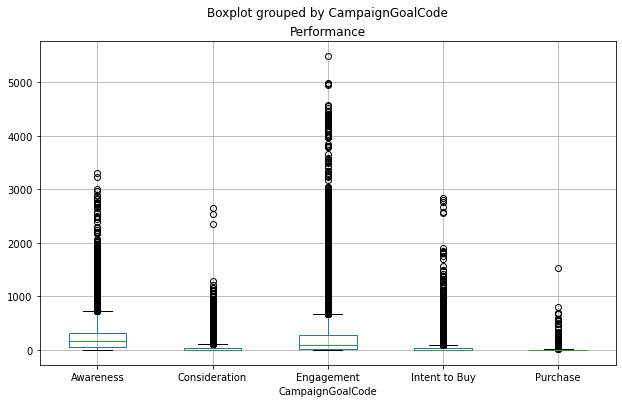

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

data2.boxplot(column='Performance', by='CampaignGoalCode', figsize=(10, 6))
plt.show()

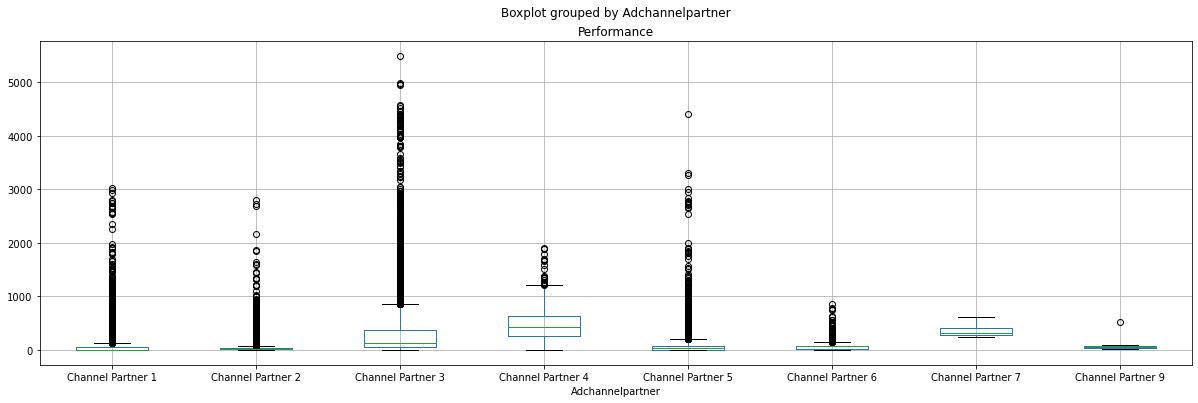

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

data2.boxplot(column='Performance', by='Adchannelpartner', figsize=(20, 6))
plt.show()